## 1. End to end scikit learn workflow

In [1]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\User\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
          pip: 22.2.2
   setuptools: 63.4.1
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.4.4
   matplotlib: 3.5.2
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


C:\Users\User\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
# Creates X (features matrix)
x = heart_disease.drop("target", axis = 1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# import warnings
# warnings.filterwarnings("default / ignore")

In [5]:
# Choosing the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
# make a prediction
#not working
y_label = clf.predict((np.array([0, 2, 3, 4]).reshape(-1, 1)))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but RandomForestClassifier is expecting 13 features as input.

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3


In [10]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3


In [11]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [12]:
y_test

217    0
173    0
164    1
2      1
82     1
      ..
245    0
230    0
136    1
152    1
132    1
Name: target, Length: 61, dtype: int64

In [13]:
# Evaluate the model on training data and test data
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.819672131147541

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[19,  6],
       [ 5, 31]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [18]:
# Improve our model
# Try different amount of n_estimators

np.random.seed(1)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) *100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 20 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 30 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 50 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 60 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 70 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 80 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 90 estimators...
Model accuracy on test set: 83.61%
 


In [19]:
# Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_hahaha.pl1", "wb" ))

In [20]:
loaded_model = pickle.load(open("random_forest_model_hahaha.pl1", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

## Getting DATA ready✌️

Three main things to do
1. Split the data into features and lebels (ususally 'X' & 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical value to numerical values (also known as feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = heart_disease.drop("target", axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y = heart_disease.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Converting non- numerical to numerical

In [26]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [27]:
car_sales.Price = car_sales.Price.str[:-2].str.replace('[/$/,/.]', '')

C:\Users\User\AppData\Local\Temp\ipykernel_17288\2243187148.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales.Price = car_sales.Price.str[:-2].str.replace('[/$/,/.]', '')


In [28]:
car_sales.Price.astype(int).describe

<bound method NDFrame.describe of 0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int32>

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [30]:
len(car_sales)

10

In [31]:
#Split into x , y
x = car_sales.drop("Price", axis = 1)
x

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [32]:
car_sales.Doors.value_counts()

4    8
3    1
5    1
Name: Doors, dtype: int64

In [33]:
y = car_sales.Price
y

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: object

In [34]:
#Splitting into train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [35]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Nissan'

### Couldnot convert obj to number. So, 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                             remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

In [36]:
 pd.DataFrame(transformed_x)

NameError: name 'transformed_x' is not defined

## those indexes positive for cars that belong to company, colour, and doors on each rows

### for example

In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies
## Doors are alredy numerical so.....

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


# Let's refit the model

In [38]:
np.random.seed(48)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)
model.fit(x_train, y_train)

NameError: name 'transformed_x' is not defined

In [39]:
model.score(x_test, y_test)


ValueError: could not convert string to float: 'Toyota'

## handle Missing values

#### Fill them with some value (also known as imputation)
#### Remove the samples with missing data altogether

In [40]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [41]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [42]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price

In [43]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder = "passthrough")
x_transformed = transformer.fit_transform(car_sales_missing)
x_transformed

NameError: name 'OneHotEncoder' is not defined

#### option : fill missing values with pandas

In [44]:
car_sales_missing.Make.fillna("missing", inplace = True)

car_sales_missing.Colour.fillna("missing", inplace = True)

car_sales_missing["Odometer"].fillna(car_sales_missing.Odometer.mean(), inplace = True)

In [45]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,missing,White,31600.000000,4.0,"$9,700"


### Remove rows with missing price values

In [46]:
car_sales_missing.dropna(inplace = True) 

In [47]:
car_sales_missing.Price = car_sales_missing.Price.str.replace('[/$/,]', '').astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_17288\2533647748.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales_missing.Price = car_sales_missing.Price.str.replace('[/$/,]', '').astype(int)


In [48]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,4000
1,Honda,Red,87899.000000,4.0,5000
2,Toyota,Blue,92302.666667,3.0,7000
3,BMW,Black,11179.000000,5.0,22000
4,Nissan,White,213095.000000,4.0,3500
5,Toyota,Green,92302.666667,4.0,4500
6,Honda,missing,92302.666667,4.0,7500
9,missing,White,31600.000000,4.0,9700


In [49]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price

In [50]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder = "passthrough")
x_transformed = transformer.fit_transform(car_sales_missing)
x_transformed

NameError: name 'OneHotEncoder' is not defined

# option
## filling missing data using scikitlearn

In [51]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price

In [55]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [56]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [57]:
# Filling missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Filling categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data

filled_x = imputer.fit_transform(x)
filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [58]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [59]:
x = car_sales_filled.drop("Prie")

KeyError: "['Prie'] not found in axis"

## Data as numbers

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make", "Colour", "Doors"]
onezero = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", onezero, categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [61]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [62]:
len(car_sales_filled), len(car_sales)

(950, 10)

# Choosing correct estimators / algorithms for problems

### Note

   * Sklearn refers to machine learning models, algorithms as estimators.
   * Classification problem - predicting a category (heart disease or not)
     * clf is short for classifier used as a classification estimator
   * Regression problem - predicting a number (selling a car)

## Import datasets online

In [63]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [64]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
# Import algorithm / estimator
# from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

# Setup random seed 
np.random.seed(42)

#Create the data
x = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df.MedHouseVal

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#Splitting the data into train test
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

#Checking the score of the model 
model.score(x_test, y_test)

0.03294573643410853

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Create the data
x = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df.MedHouseVal


#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Create random forest model
model = RandomForestRegressor()

#Fitting model on the training data
model.fit(x_train, y_train)

# check the score of the model on test set
model.score(x_test, y_test)

0.8065734772187598

## Picking a machine learning model for classification problems

In [68]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer


In [69]:
heart_disease = pd.read_csv("heart-disease.csv")

In [70]:
from sklearn.svm import LinearSVC

np.random.seed(42)
    
x = heart_disease.drop("target", axis = 1)
y = heart_disease.target


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearSVC(max_iter = 10000)

model.fit(x_train, y_train)

model.score(x_test, y_test)





C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [71]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

## If we have structured data, we use ensemble methods or estimators
## If we have unstructured data, we use deep learning or transfer learning

In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [74]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Make predictions using a machine learning model
#### 2 ways to make predictions 
predict()
predict_proba()

In [75]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 3, 4, 5]))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 3. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
clf.predict(x_test)

In [ ]:
np.array(y_test)

In [ ]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

## Make predictions using predict_proba()

predict_probs() returns probabilities of classification label

In [ ]:
clf.predict_proba(x_test[:5])

In [76]:
# Lets predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [77]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [78]:
housing_df = pd.DataFrame(housing["data"], columns = housing.feature_names)

In [79]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [80]:
housing_df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
housing_df["MedHouseVal"] = housing.target

In [82]:
x = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df.MedHouseVal

In [83]:
model = RandomForestRegressor(n_estimators = 10000)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

model.fit(x_train, y_train)



RandomForestRegressor(n_estimators=10000)

In [84]:
model.score(x_train, y_train)

0.9744830707536583

In [85]:
y_test

13976    1.339
14980    1.291
6097     1.996
7808     1.856
5995     1.121
         ...  
4767     1.222
18973    1.577
3580     2.304
12894    1.990
4148     1.676
Name: MedHouseVal, Length: 4128, dtype: float64

In [86]:
y_pred

NameError: name 'y_pred' is not defined

In [87]:
#Comparing the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

NameError: name 'y_pred' is not defined

## Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/ estimators:
    1. Estimator's built-in 'score()' method
    2. The 'scoring' parameter
    3. Problem-specific metric function

In [89]:
from sklearn.metrics import r2_score

#Filling an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [90]:
y_test_mean[:10]

array([2.06813036, 2.06813036, 2.06813036, 2.06813036, 2.06813036,
       2.06813036, 2.06813036, 2.06813036, 2.06813036, 2.06813036])

In [91]:
r2_score(y_test, y_test_mean)

1.1102230246251565e-16

Mean absolute error MAE
MAE is the average of the absolute differences between predictions and actual values.

It shows how strong the models predictions are.

In [92]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3244971014604922

## Using different metrics as Scikit_learn functions


#### For classification problems

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

# Evaluating a model
print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test, clf.predict(x_test))*100:.2f}%")
print(f"Precision : {precision_score(y_test, clf.predict(x_test))}")
print(f"Recall : {recall_score(y_test, clf.predict(x_test))}")
print(f"F1 : {f1_score(y_test, clf.predict(x_test))}")

Classifier metrics on the test set
Accuracy : 85.25%
Precision : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


In [94]:
heart_disease.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

#### For regression problems

In [95]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df.MedHouseVal

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

#Evaluating the model
print("Regression metrics on the test set")
print(f"R2 score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score : 0.8065734772187598
MAE : 0.32659871732073664
MSE : 0.2534678520824551


## Improving a model

In [96]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning hyperparameters
making 3 sets training, validation and test

Trying
max-depth
max_features
min_sample_leaf
min_sample_split
n_estimators

In [118]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparision on y_true labels vs. y_pred labels on a classification.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1_score" : round(f1, 2)}
    print(f"Accuracy : {accuracy *100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"f1_score : {f1:.2f}")
          
    return metric_dict

In [119]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

In [123]:
heart_disease_shuffled

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled.target

train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy : 82.22%
Precision : 0.81
Recall : 0.88
f1_score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1_score': 0.85}

In [130]:
np.random.seed(42)

clf2 = RandomForestClassifier( max_depth = 1.1)
clf2.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

clf2_baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy : 82.22%
Precision : 0.81
Recall : 0.88
f1_score : 0.85


## Hyperparameter tuning with Randomized Search Cross Validation CV

In [151]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
       "max_depth" : [None, 5, 10, 20, 30, 40],
       "max_features" : ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)# Set

clf = RandomForestClassifier(n_jobs = 1)

#Setup Randomized search CV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10,
                           cv = 5,
                           verbose = 2)

In [152]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [153]:
rs_clf.best_params_
#These are the best hyperparameters found by the Randomized Search CV.

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [154]:
y_preds = rs_clf.predict(X_test)
y_preds

rs_metrics = evaluate_preds(y_test, y_preds)

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
f1_score : 0.81


## Hyperparameter tuning with grid search CV

In [155]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [156]:
grid_2 = {'n_estimators': [200, 500, 1000],
         'max_depth': [30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [158]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)# Set

clf = RandomForestClassifier(n_jobs = 1)

#Setup Grid search CV
gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [159]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [160]:
gs_y_preds = gs_clf.predict(X_test)

gs_clf_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy : 83.61%
Precision : 0.78
Recall : 0.89
f1_score : 0.83


Let's compare our different model metrics

<AxesSubplot:>

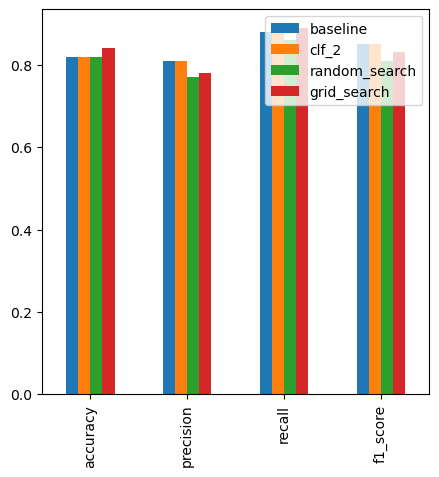

In [162]:
compare_metrics = pd.DataFrame({'baseline' : baseline_metrics,
                                'clf_2' : clf2_baseline_metrics,
                              'random_search' : rs_metrics,
                               'grid_search' : gs_clf_metrics})

compare_metrics.plot.bar(figsize = (5, 5))

### Saving and loading trained machine learning models

* with python picke module
* with the joblib module

In [164]:
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [165]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [167]:
#Make some predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy : 83.61%
Precision : 0.78
Recall : 0.89
f1_score : 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1_score': 0.83}

In [170]:
# Using joblib
from joblib import dump, load

dump(gs_clf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [171]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [173]:
# predictions using joblib (use in case of large numpy arrays)
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy : 83.61%
Precision : 0.78
Recall : 0.89
f1_score : 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1_score': 0.83}

## Putting it all together

In [175]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [176]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [178]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Steps to do (all in one cell)


In [191]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
np.random.seed(42)

#Import data and drop price rows with missing columns because its our target
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = [
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_features)
])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

#Splitting data
X= data.drop("Price", axis=1)
y = data.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Fitting data into the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

* Also possible to use grid search CV or randomized search CV with pipeline

In [200]:
# Use frid search CV with regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean", "median"],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2, 4]
}

gs_modelk = GridSearchCV(model, pipe_grid, cv = 2, verbose = 2)
gs_modelk.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [201]:
gs_modelk.score(X_test, y_test)

0.3337285509245922